이번에는 Seaborn에서 허용하는 데이터 구조와 데이터 작업에 필요한 다양한 방법을 알아본다. Seaborn은 Python 유형뿐만 아니라 pandas나 numpy 라이브러리로 표현된 데이터도 허용한다.

# Long-form vs. wide-form data
- seaborn의 대부분 구성은 벡터로 된 데이터를 따른다.
- x에 대해 구성할 때 y의 값은 벡터여야 한다.

## Long-form data
- 긴 형식의 데이터 테이블의 특징 : 열은 각 변수이고 행은 정보이다. (데이터의 기준이 위에만 있다)

In [1]:
# example) 'flights' 데이터
import seaborn as sns
import matplotlib.pyplot as plt
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


- 긴 형식의 데이터를 사용하면 테이블의 열을 변수 중 하나로 할당하여 plot을 생성한다.

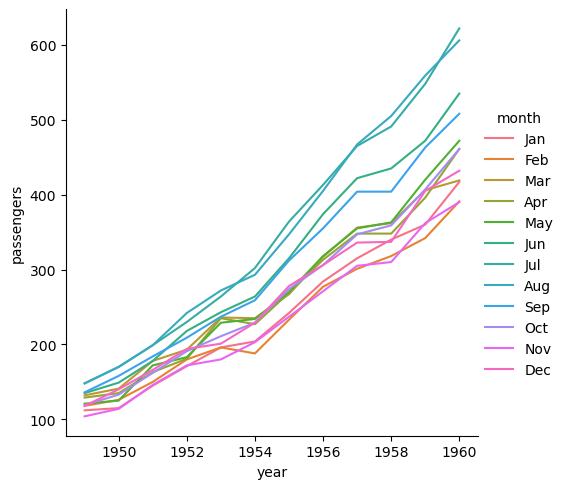

In [2]:
sns.relplot(data=flights, x='year', y='passengers', hue='month', kind='line')

- 긴 형식 데이터의 장점
1. plot의 명시적 사양에 적합하다.
2. 변수와 관찰이 명확하게 정의될 수 있는 한, 임의의 복잡성 데이터 세트를 수용할 수 있다.
- 그러나, 머리 속에 있는 데이터의 모델이 아닌 경우가 많기 때문에 익숙해지는데 오래걸림.

## Wide-form data
- 간단한 데이터 셋의 경우, 열과 행에 다양한 수준의 변수가 포함된 스프레스시트에서 데이터를 보는 방식으로 생각하는 것이 더 직관적인 경우가 많다. (위와 옆에 모두 데이터의 기준이 있다)
- 예를 들어, 항공편 데이터 셋을 `pivot`하여 넓은 형식의 조직으로 변환하여 각 열에 연도별, 월별 시계열이 포함되도록 할 수 있다.

In [3]:
flights_wide = flights.pivot(index='year', columns='month', values='passengers')
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


- 위에는 동일한 세 가지 변수(year, month, passengers)가 있지만 다르게 구성되어 있다.
- 이 데이터 셋의 정보는 이제 테이블에 종속되며, 테이블 행과 열 인덱스에 의한 좌표로 정의된다.
- 긴 형식의 데이터 : 이름으로 데이터 세트의 변수에 액세스 가능
- 넓은 형식의 데이터 : 불가능. 그러나 seaborn의 plot에서 변수 역할을 할당해주어 가능해짐.

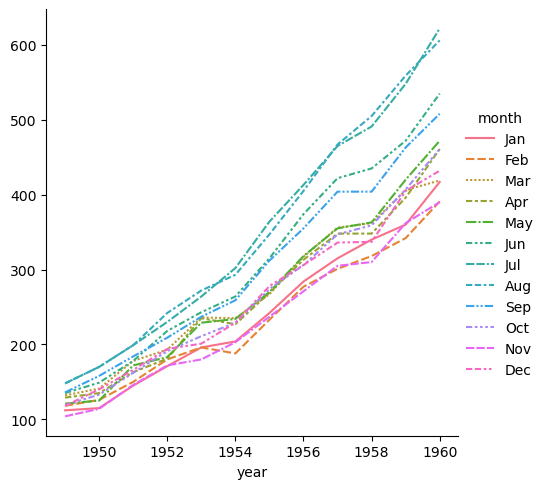

In [4]:
# 넓은 형식
wide = sns.relplot(data=flights_wide, kind="line")
plt.show(wide)

- 해당 플롯은 긴 형식의 데이터 플롯과 유사해보인다.
- seaborn은 x에 year 데이터 값을, y에 passengers 데이터 값을 넣고, month 값으로 각 선을 그려넣었다.
- 단, 데이터 셋이 긴 형식에서 넓은 형식으로 변환하는 `pivot` 작업을 거치면서 y축 레이블이 사라졌다는 것이 차이점이다.
- y축 레이블이 사라진 이유 : month를 `style`로 지정했기 때문이다.

넓은 형식 데이터와 긴 형식 데이터 각각의 장점
- 넓은 형식 데이터 : 거의 동일한 plot을 만드느데 타이핑을 훨씬 적게 함
- 긴 형식 데이터 : 데이터가 올바른 형식이면 더 이상 구조에 대해 생각할 필요가 없음. ↓

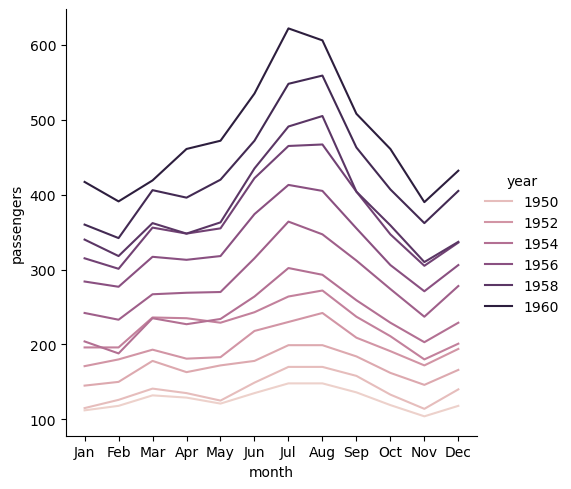

In [5]:
# 긴 형식 데이터
long = sns.relplot(data=flights, x='month', y='passengers', hue='year', kind='line')
plt.show(long)

- 넓은 형식 데이터 셋으로 동일하게 하려면 테이블을 `transpose()` 해야한다.

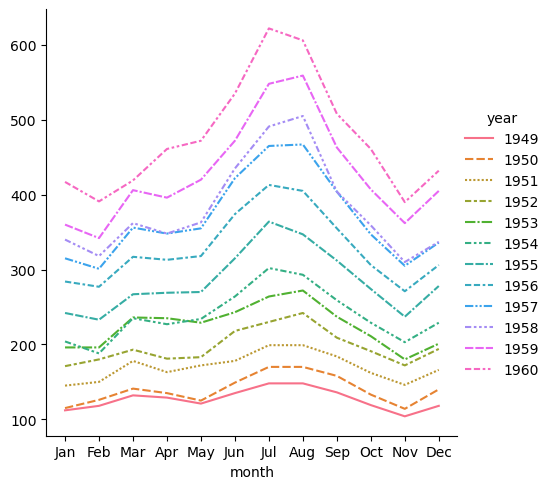

In [6]:
# 넓은 형식 데이터
wi = sns.relplot(data=flights_wide.transpose(), kind='line')
plt.show(wi)

- 두 그래프의 선이 다르게 그려진 이유 : 
- seaborn은 데이터 유형에 관계없이 넓은 데이터 세트의 열 변수를 범주형으로 간주하지만, 긴 형식의 변수는 숫자이기 때문에 양적 색상 팔레트가 할당되어 

- 명시적 변수할당이 없다 = 넓은 형식 데이터와 각 플롯간에 매핑 정의가 필요하다
- 그러나, 이는 플롯 유형에 따라 다를 수 있으므로 넓은 형식 데이터를 사용할 때 결과를 예측하기 어렵다.
- ex) 범주형 도표는 테이블의 열을 x에 할당한다 (인덱스 상관 없음)

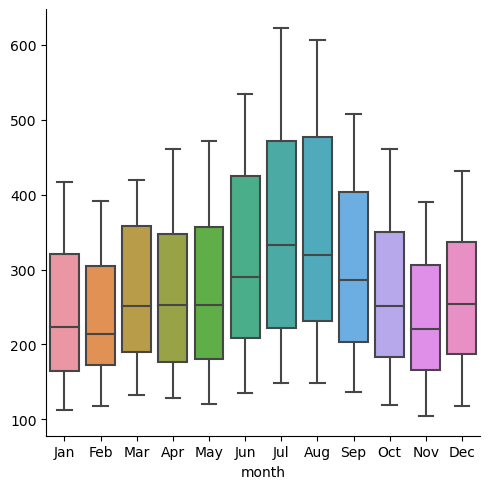

In [7]:
b = sns.catplot(data=flights_wide, kind='box')
plt.show(b)

- 넓은 형식 데이터를 표현하기 위해 `pandas`를 사용하는 경우, 변수는 3개 이하로 제한된다.
- seaborn이 `pandas`가 테이블 형식으로 추가 변수를 나타내는 방식인 '다중 인덱스 정보'를 사용하지 않기 때문이다.
- xarray 는 레이블이 지정된 N차원 배열개체를 제공한다.
- 현재 seaborn은 바로 xarray를 사용하지 못하기 때문에 `pandas`메소드인 DataFrame을 사용하여 긴 형식 데이터로 변환하여 사용할 수 있다.
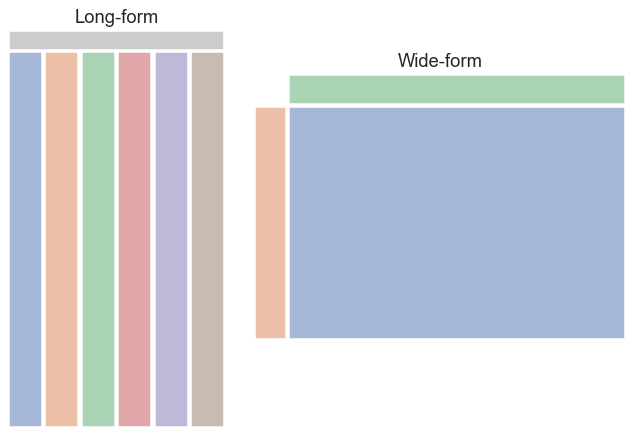

## Messy data
- 많은 데이터 셋은 긴 형식, 넓은 형식으로 명확하게 해석되지 않는다. 그걸 '지저분한 데이터'라고 한다.
- 지저분한 데이터 세트에서 변수는 키나 테이블 차원에서 고유하게 정의되지 않는다.
- 이는 반복측정 데이터에서 자주 발생한다.

In [8]:
anagrams = sns.load_dataset("anagrams")
anagrams.head()

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8


- 변수 내의 값뿐만 아니라 변수끼리도 주의할 필요가 있다. (1부터 3까지의 num)
- (1부터 3까지의 num은 솔루션 번호이고, 값은 점수로 예상된다.)
- 위의 데이터는 명확하게 긴 형식의 데이터도, 넓은 형식의 데이터도 아니다.

- 위의 데이터로 평균을 구하기 위해서 먼저, 데이터 구조를 긴 형식 혹은 넓은 형식 중 하나로 바꾸어야 한다.
- 긴 형식의 데이터로 변환하기 ↓

In [9]:
# 긴 형식 데이터로 변환
# num1, num2, num3을 'solutions'라는 컬럼에 담고, 안에 있던 값은 'score'이라는 변수에 담는다.
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


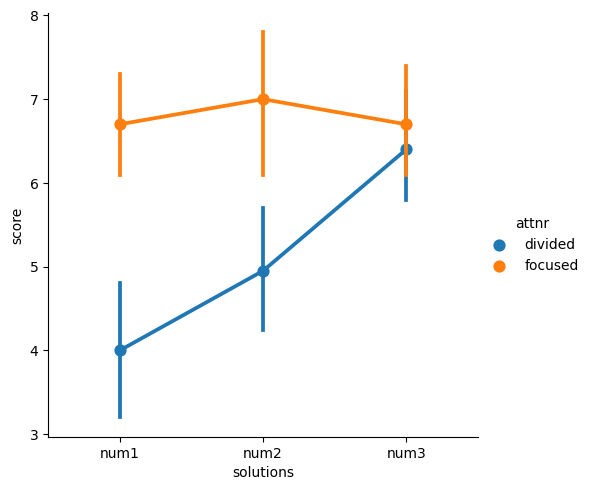

In [10]:
# 긴 형식 데이터의 플롯은 세 개 이상의 변수를 할당할 수 있음.
# solutions, score, attnr.
ana = sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")
plt.show(ana)

## Further reading and take-home points
- 테이블 형식 데이터 구조에 대한 자세한 내용 문서참조 : https://vita.had.co.nz/papers/tidy-data.pdf
- 긴 형식의 데이터의 이점 
1. 데이터 세트의 변수의 플롯에 명시적으로 할당할 수 있음.
2. 세 개 이상의 변수를 사용하여 그릴 수 있음.
3. 가능한 진지한 분석을 할 때 긴 형식의 구조로 나타내는 것을 추천함. (넓은 형식이 자연스러울 때도 있음 !!)
4. seaborn 문서의 대부분의 예제도 긴 형식 데이터를 사용함.

# Options for visualizing long-form data
- 긴 형식의 데이터에는 정확한 정의가 있지만 seaborn은 실제로 메모리의 데이터 구조 전체에서 구성되는 방식 측면에서 상당히 유연하다.
- 문서의 나머지 부분에 있는 예제에서는 일반적으로 `pandas.DataFrame`플롯의 변수에 해당 열의 이름을 할당하여 오브젝트 및 참조 변수를 사용한다. 
- 그러나 Python 사전 또는 해당 인터페이스를 구현하는 클래스에 벡터를 저장하는 것도 가능합니다.

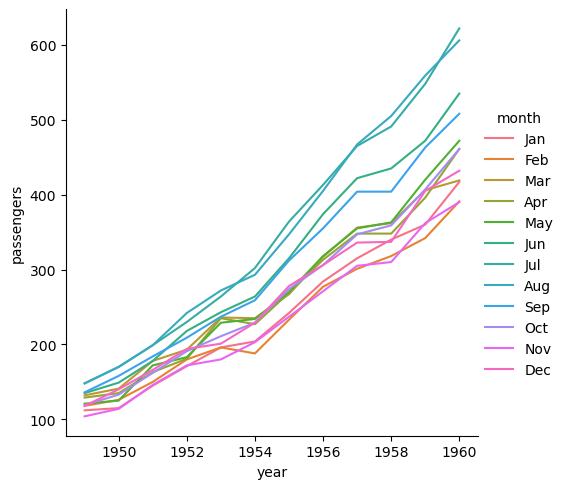

In [17]:
flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line");

- group-by의 split-apply-combine 작업과 같은 많은 pandas 작업은 정보가 입력 데이터 프레임의 열에서 출력 인덱스로 이동한 데이터 프레임을 생성한다.
- 이름이 유지되는 한 여전히 정상적으로 데이터를 참조할 수 있습니다.

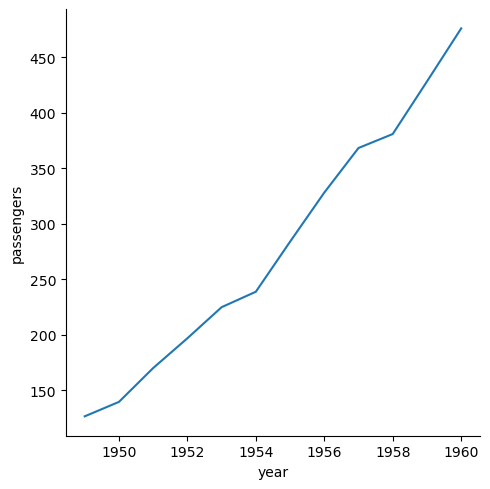

In [16]:
flights_avg = flights.groupby("year").mean()
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line");

- 또한 테이터 벡터를  `x`, `y`나 기타 플로팅 변수에 대한 인수로 직접 전달할 수도 있다.
- 이러한 벡터가 pandas 개체인 경우 이름 특성을 사용하여 플롯에 레이블을 지정한다.

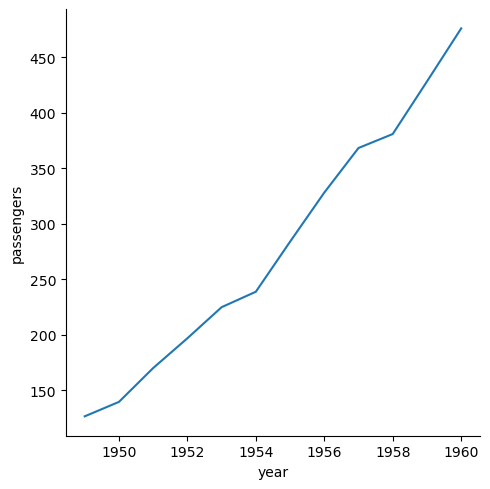

In [15]:
year = flights_avg.index
passengers = flights_avg["passengers"]
sns.relplot(x=year, y=passengers, kind="line");

- Python 시퀀스 인터페이스를 구현하는 Numpy 배열 및 기타 개체도 작동하지만 이름이 없으면 추가 조정 없이 플롯이 유익하지 않다.

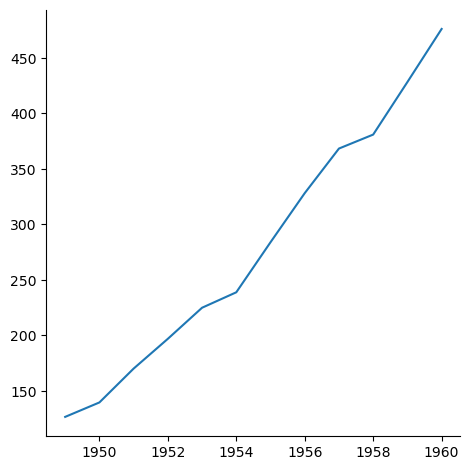

In [19]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line");

# Options for visualizing wide-form data
- 넓은 형식의 데이터를 전달하는 옵션은 훨씬 더 유연하다. 긴 형식의 데이터와 마찬가지로 이름(경우에 따라 색인) 정보를 사용할 수 있기 때문에 pandas 개체가 선호된다.
- 그러나 본질적으로 단일 벡터 또는 벡터 모음으로 볼 수 있는 모든 형식을 `데이터`로 전달할 수 있으며 일반적으로 유효한 플롯을 구성할 수 있다.
- 위에서 본 예에서는 직사각형의 `pandas.DataFrame`을 사용했으며, 이는 해당 열의 모음으로 생각할 수 있다. Pandas 개체의 사전 또는 목록도 작동하지만 축 레이블이 손실된다.

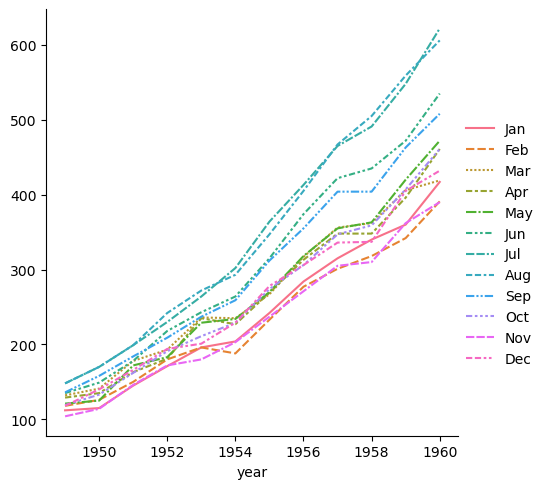

In [20]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind="line");

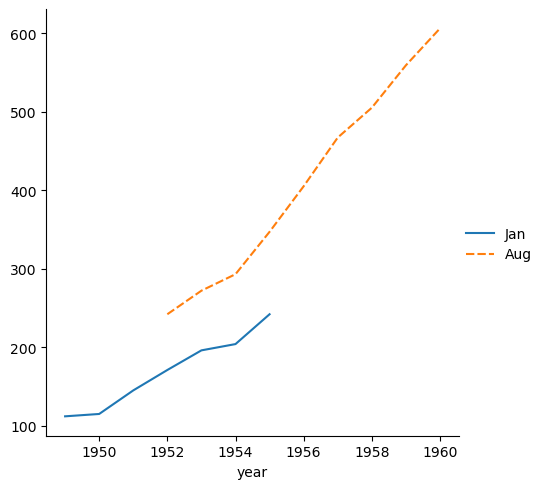

In [21]:
# 컬렉션의 벡터는 길이가 같을 필요가 없다. 인덱스가 있으면 정렬하는 데 사용된다.
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="line");

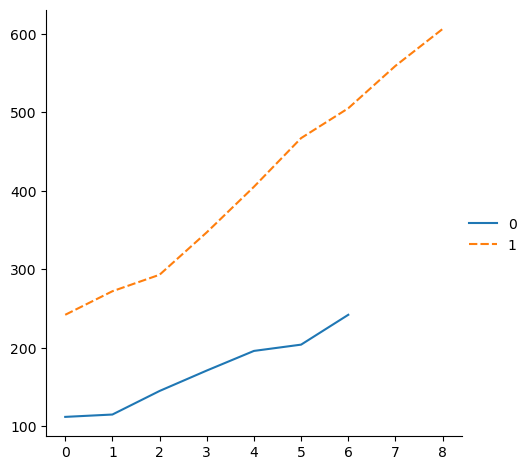

In [22]:
# 서수 인덱스는 numpy 배열 또는 간단한 Python 시퀀스에 사용된다.
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind="line");

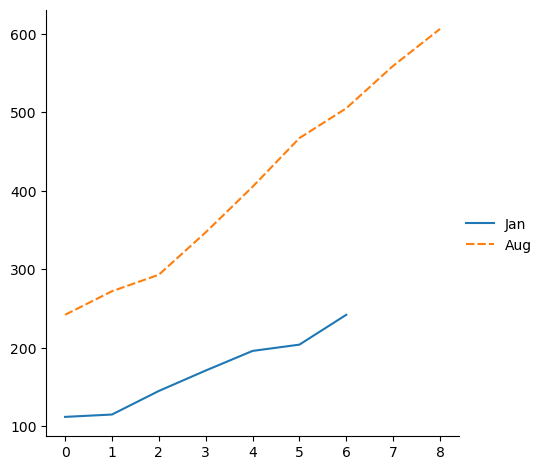

In [23]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line");

- 직사각형 numpy 배열은 인덱스 정보가 없는 데이터 프레임처럼 취급되므로 열 벡터의 모음으로 간주된다.
- 이것은 단일 인덱서가 행에 액세스하는 numpy 인덱싱 작업의 작동 방식과 다르다.
- 그러나 pandas가 배열을 데이터 프레임으로 변환하는 방법 또는 matplotlib가 배열을 그리는 방법과 일치한다.

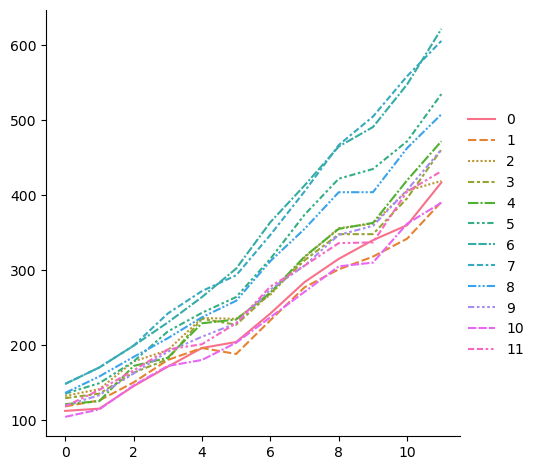

In [24]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line");